# Pandas

Pandas is another module that, like numPy, is widely used in the scientific community. We'll look at how it is commonly used to read in files to a Pandas _'DataFrame'_ which is something like a cross between a 2D numPy array and a spreadsheet sheet (the Pandas 1D equivalent is called a _Series_). It allows the data to be processed and manipulted in many ways and we'll look at some of the basic methods used.

We've provided a small CSV file called '**observatories-Demo.csv**' which should be put into the same folder as this notebook. If this were opened in a spreadsheet it would look like this:

![observatories.png](observatories.png)

Notice that the first 2 rows are either a comment or blank. The 3rd row shows the data column names and the actual data starts on the 4th line.

Let's read this in using Pandas and see how to perform some basic functions.

First, do your imports and set up any other constants or Jupyter settings



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. READING IN DATA

Now let's read in the file to a pandas datframe.

Things to note:

We've told Pandas that the columns are delimted by ',' - actually this is the default but you could change this to any other character that is used in the file. (If it's tab delimited use sep='\t' or for space delimited use sep='\s+')

We've also told it where the data starts, missing out some information lines, starting with the row containing column headings, by using 'header=2'.

At the end of this notebook there is a section which describes how you can get more control on which data you read in and which you leave out.

In [8]:
df = pd.read_csv('observatories-DEMO.csv', sep=',', header=2)


So what does it look like? well, just type the dataframe's name.

Things to note:

Pandas has recognised that the first actual line it comes to (after the 'header' lines have been skipped) is the actual names of the columns. 

It has automatically 'indexed' the rows (the numbers on the left) based on the order the rows appear in the file We'll be changing this later, indexing on a column.



In [9]:
df

,Observatory,short,lat,long,altitude
0,Australian Astronomical Observatory,AAO,-31.275560,149.067293,1164
1,Mauna Kea,MAK,19.822800,-155.477000,4092
2,Green Bank Telescope,GBT,38.433056,-79.839722,101
3,ARROW,ARROW,52.024440,-0.706390,115
4,PIRATE,PIRATE,28.300000,-16.509722,2390
5,Armagh,AGH,54.353200,-6.650000,100
6,Arecibo,ARC,18.344170,-66.752780,497
7,Apache Point,AP,32.780278,-105.820278,2788
8,Effelsberg 100m Radio Telescope,ERT,50.524700,6.882800,319
9,VLT,VLT,-24.627330,-70.404170,2635


### EXERCISE 1.1

Just using 'df' gives a nicely formatted output. Try running print(df) as an alternative



You can also just look at the first few or last few rows:


In [10]:
df.head(4)

,Observatory,short,lat,long,altitude
0,Australian Astronomical Observatory,AAO,-31.275560,149.067293,1164
1,Mauna Kea,MAK,19.822800,-155.477000,4092
2,Green Bank Telescope,GBT,38.433056,-79.839722,101
3,ARROW,ARROW,52.024440,-0.706390,115


In [11]:
df.tail(3)

,Observatory,short,lat,long,altitude
10,Atacama Large Millimetre Array,ALMA,-23.019300,-67.753200,5058
11,Isaac Newton Group,ING,28.762056,-17.877639,2396
12,Large Millimeter Telescope,LMT,18.985833,-97.314722,4640


## 2. ADDING MORE DATA

At some point we'll need to add data (new rows or columns) to our DataFrame. How do we do this?

###  2.1 Rows

Lets add a row for Jodrell Bank radio observatory in Cheshire, UK. You'll need to set up a dictionary (Dict) object where the keys are the column identifiers and the values are the actual row data points.

We can then append this to our datframe - and this produces a NEW dataframe (doesn't modify the currect one) which we can asign to a new variable name. Note that we have to set the parameter 'ignore_index=True')

A word of warning, becuase this method creates a completely new dataframe it can use considerable memory for large data sets. There are other, more economical (but oiften slower) ways. (df.loc[len(df)] = ['blah blah', 'BB', 53, 2, 100], modifies df insitu) RTFM.


In [12]:
new_row = {'Observatory':'Jodrell Bank', 'short':'JB', 
           'lat':53.23625, 'long':-2.307139, 'altitude':77}

df_mod = df.append(new_row, ignore_index=True)

df_mod


,Observatory,short,lat,long,altitude
0,Australian Astronomical Observatory,AAO,-31.275560,149.067293,1164
1,Mauna Kea,MAK,19.822800,-155.477000,4092
2,Green Bank Telescope,GBT,38.433056,-79.839722,101
3,ARROW,ARROW,52.024440,-0.706390,115
4,PIRATE,PIRATE,28.300000,-16.509722,2390
5,Armagh,AGH,54.353200,-6.650000,100
6,Arecibo,ARC,18.344170,-66.752780,497
7,Apache Point,AP,32.780278,-105.820278,2788
8,Effelsberg 100m Radio Telescope,ERT,50.524700,6.882800,319
9,VLT,VLT,-24.627330,-70.404170,2635


### 2.2 Columns

How about adding a column. You can add a column with a simple, default value like this:

**`df['new_column_name'] = 42`**

Probably more usefully, let's add a column, named 'hemisphere', that indicates if the observtory is 'Southern' or 'Northern'. This is a little tricky but can be done based on numpy's '**`where()`**' function, which does a boolean comparison and returns its first or second parameter based on the boolean.


In [13]:
df_mod['hemisphere'] = np.where(df_mod['lat'] <0, 'Southern', 'Northern')
df_mod

,Observatory,short,lat,long,altitude,hemisphere
0,Australian Astronomical Observatory,AAO,-31.275560,149.067293,1164,Southern
1,Mauna Kea,MAK,19.822800,-155.477000,4092,Northern
2,Green Bank Telescope,GBT,38.433056,-79.839722,101,Northern
3,ARROW,ARROW,52.024440,-0.706390,115,Northern
4,PIRATE,PIRATE,28.300000,-16.509722,2390,Northern
5,Armagh,AGH,54.353200,-6.650000,100,Northern
6,Arecibo,ARC,18.344170,-66.752780,497,Northern
7,Apache Point,AP,32.780278,-105.820278,2788,Northern
8,Effelsberg 100m Radio Telescope,ERT,50.524700,6.882800,319,Northern
9,VLT,VLT,-24.627330,-70.404170,2635,Southern



# 3. Writing the modified data back to disk

You can, of course, now write this modified data back to a file. Pandas makes this very straight forward. Here's an example.

The 'index=False' just ensures that you don't get a column with 0,1,2,3,... in the file. 


In [14]:
df_mod.to_csv('observatories-MODIFIED.csv',index=False)


This creates a new file and writes the data to it. If the file already exits it will overwrite any pre-existing data in it. You may just want to append the data though, and this can be done pretty much the same way you would do it in 'ordinary' Python:

```python
   df_mod.to_csv('observatories-MODIFIED.csv',index=False, mode='a')
```



## 4. ACCESSING SECTIONS OF YOUR DATA

How can we get at sub-sets of our data?


### 4.1 Columns

You can access a single column by using the name of the column. Like this:

(Note that you can combine this with **`head()`** and **`tail()`** -  **`df['Observatory'].head())`**



In [15]:
df_mod['Observatory']

0     Australian Astronomical Observatory
1                               Mauna Kea
2                    Green Bank Telescope
3                                   ARROW
4                                  PIRATE
5                                  Armagh
6                                 Arecibo
7                            Apache Point
8         Effelsberg 100m Radio Telescope
9                                     VLT
10         Atacama Large Millimetre Array
11                     Isaac Newton Group
12             Large Millimeter Telescope
13                           Jodrell Bank
Name: Observatory, dtype: object


Note that, at the bottom of the listing, it shows this is an 'object'. In fact the object is a Pandas Series in this case. You could convert this to a numpy array (**`np.array(df_mod['Observatory'])`** or even a normal Python list (**`list(df_mod['Observatory'])`**).


### EXERCISE 4.1

Display the last 3 rows of the 'short' column


In [16]:
df_mod['short'].tail(3)

11    ING
12    LMT
13     JB
Name: short, dtype: object

### 4.2 Rows

Selecting rows is a little less intuitive. We'll look at using '**.iloc**' (which uses numerical indices) and logic based selections here.Then, later, after talking about indexing we'll show a further method, based on a modified index.

#### 4.2.1 iloc

Firstly using **.iloc**. This is similar to using numPy slices and is something along the lines of datframe[startRow-1:endRow, startCol-1:endCol]  

Let's look at finding rows 3 to 5 (Green Bank to PIRATE, indexed as 2,3 and 4 - Remember indices start at 0)


In [17]:
df_mod.iloc[2:5,:]

,Observatory,short,lat,long,altitude,hemisphere
2,Green Bank Telescope,GBT,38.433056,-79.839722,101,Northern
3,ARROW,ARROW,52.024440,-0.706390,115,Northern
4,PIRATE,PIRATE,28.300000,-16.509722,2390,Northern



Extending the 'slices' approach we can restrict the number of columns at the same time:
    

In [18]:
df_mod.iloc[2:5,1:4]

,short,lat,long
2,GBT,38.433056,-79.839722
3,ARROW,52.024440,-0.706390
4,PIRATE,28.300000,-16.509722


### 4.3 Logic based selections

Now for the 'logic' based selection. For this we'll be using **loc**

#### 4.3.1 loc

We might, for example, just want to use the Southern observatories:
    

In [13]:
df_mod.loc[df_mod['lat'] < 0]

,Observatory,short,lat,long,altitude,hemisphere
0,Australian Astronomical Observatory,AAO,-31.27556,149.067293,1164,Southern
9,VLT,VLT,-24.62733,-70.404170,2635,Southern
10,Atacama Large Millimetre Array,ALMA,-23.01930,-67.753200,5058,Southern



(Note: actually **`df[df['lat'] <0]`** will also work just fine.)



Or the ones that are at an altitude of over 4000 metres:


In [21]:
df_mod.loc[(df_mod['altitude'] > 4000)]

,Observatory,short,lat,long,altitude,hemisphere
1,Mauna Kea,MAK,19.822800,-155.477000,4092,Northern
10,Atacama Large Millimetre Array,ALMA,-23.019300,-67.753200,5058,Southern
12,Large Millimeter Telescope,LMT,18.985833,-97.314722,4640,Northern


### EXERCISE 4.3

How would you get all the southern observatories over 4000m high? (HINT don't use 'and' you'll need to use '&')


In [22]:
df_mod.loc[(df_mod['altitude'] > 4000) & (df['lat'] < 0)]

,Observatory,short,lat,long,altitude,hemisphere
10,Atacama Large Millimetre Array,ALMA,-23.0193,-67.7532,5058,Southern


 ## 5. INDEXING

At the moment, the row index is pretty much like any other list or array - starting at 0 and incrementing. But we can modify this by indexing on another column. Let's say we want to be able to get easy acces to data based on the 'short' column. 

For this we can use the **`.set_index()`** function. (You can reindex 'inplace' by passing the parameter **`'inplace=True'`**)

So, using our example and indexing on 'short' (**Note, the `drop=False` is important because if we don't do this and re-index later we'd lose the column name 'short'**) we get:


In [23]:
df_mod.set_index('short', inplace=True, drop=False)
df_mod

,Observatory,short,lat,long,altitude,hemisphere
short,,,,,,
AAO,Australian Astronomical Observatory,AAO,-31.275560,149.067293,1164,Southern
MAK,Mauna Kea,MAK,19.822800,-155.477000,4092,Northern
GBT,Green Bank Telescope,GBT,38.433056,-79.839722,101,Northern
ARROW,ARROW,ARROW,52.024440,-0.706390,115,Northern
PIRATE,PIRATE,PIRATE,28.300000,-16.509722,2390,Northern
AGH,Armagh,AGH,54.353200,-6.650000,100,Northern
ARC,Arecibo,ARC,18.344170,-66.752780,497,Northern
AP,Apache Point,AP,32.780278,-105.820278,2788,Northern
ERT,Effelsberg 100m Radio Telescope,ERT,50.524700,6.882800,319,Northern



So, now the index is based on the short names

This is useful because we can now easily access rows more 'naturally' by their indexd name


In [30]:
df_mod.loc['ARC',:]


Observatory     Arecibo
short               ARC
lat             18.3442
long           -66.7528
altitude            497
hemisphere     Northern
Name: ARC, dtype: object


This doesn't look like a row - and it isn't. However, as before, you can easily turn it into a list or numPy array by using **`df.get_values()`** or **`np.array(df)`**. You can also access values from it using the attribute names shown ('Observatory', 'short', 'lat' etc.)


In [28]:
row_obj = df_mod.loc['ALMA',:]
print('The longitude of', row_obj.Observatory, 'is', row_obj.long, 'degrees')
print('It is a', row_obj.hemisphere, 'observatory')
nump_row=row_obj.get_values()
print('The numPy array is', nump_row)

The longitude of Atacama Large Millimetre Array is -67.7532 degrees
It is a Southern observatory
The numPy array is ['Atacama Large Millimetre Array' 'ALMA' -23.0193 -67.7532 5058 'Southern']


**Single values**

And, of course, you can get a single value from the DatFrame:

In [19]:
df_mod.loc['ARC','altitude']

497

### EXERCISE 5.1

What is the name of the highest observatory and what are its coordinates (using North/South and W/E)

HINT: 

1. Find the highest altitude (use the np.max() function on a row)
2. use this to search and get the row
3. retreive the lat and long
4. do some string formating stuff 
5. print it out


In [32]:
# Get highest observatory
alt_max = np.max(df_mod['altitude'])
# Which row is this in?
highest_row=df_mod.loc[df_mod['altitude']==alt_max]
# use the attribute names. In each case a Series is returned with only a single item
# hence we use the [0] to get this.
lat = (float(highest_row.lat[0]))
# and longitude
lon = (float(highest_row.long[0]))
# and the name
nam = highest_row.Observatory[0]
# Construct the latitude string - check if <0, get the string value of
# the absolute value and add '-S' etc. accordingly
if lat<0:
    latval = str(abs(lat))+'-S'
else:
    latval = str(abs(lat))+'-N'
if lon<0:
    lonval = str(abs(lon))+'-W'
else:
    lonval = str(abs(lon))+'-`e'

print('The highest observatory is', nam,'at', lonval, ' ', latval)

The highest observatory is Atacama Large Millimetre Array at 67.7532-W   23.0193-S



## 6. GETTING RID OF STUFF WE DON'T WANT

What if we don't want everything in the DataFrame? It is possible to get rid of (Drop in Pandas parlance) data.

### 6.1 Rows

Use the **`.drop()`** function with a row name (if indexed) or numeric index if not. If it is indexed and you want to use a numberic index, use the **`df.index()`** function. We also need to specify which 'axis' is to be dropped. **`axis[0]`** refers ro a row (and **`axis[1]`** refers to a column - see later)


In [21]:
df_drop = df_mod.drop('ERT',axis=0)
df_drop


,Observatory,short,lat,long,altitude,hemisphere
short,,,,,,
AAO,Australian Astronomical Observatory,AAO,-31.275560,149.067293,1164,Southern
MAK,Mauna Kea,MAK,19.822800,-155.477000,4092,Northern
GBT,Green Bank Telescope,GBT,38.433056,-79.839722,101,Northern
ARROW,ARROW,ARROW,52.024440,-0.706390,115,Northern
PIRATE,PIRATE,PIRATE,28.300000,-16.509722,2390,Northern
AGH,Armagh,AGH,54.353200,-6.650000,100,Northern
ARC,Arecibo,ARC,18.344170,-66.752780,497,Northern
AP,Apache Point,AP,32.780278,-105.820278,2788,Northern
VLT,VLT,VLT,-24.627330,-70.404170,2635,Southern


In [22]:
df_drop_num = df_drop.drop(df_drop.index[9], axis=0)
df_drop_num

,Observatory,short,lat,long,altitude,hemisphere
short,,,,,,
AAO,Australian Astronomical Observatory,AAO,-31.275560,149.067293,1164,Southern
MAK,Mauna Kea,MAK,19.822800,-155.477000,4092,Northern
GBT,Green Bank Telescope,GBT,38.433056,-79.839722,101,Northern
ARROW,ARROW,ARROW,52.024440,-0.706390,115,Northern
PIRATE,PIRATE,PIRATE,28.300000,-16.509722,2390,Northern
AGH,Armagh,AGH,54.353200,-6.650000,100,Northern
ARC,Arecibo,ARC,18.344170,-66.752780,497,Northern
AP,Apache Point,AP,32.780278,-105.820278,2788,Northern
VLT,VLT,VLT,-24.627330,-70.404170,2635,Southern


### 6.2 Columns

are pretty much the same:
    

In [23]:
df_drop_col = df_drop_num.drop('altitude', axis=1)
df_drop_col

,Observatory,short,lat,long,hemisphere
short,,,,,
AAO,Australian Astronomical Observatory,AAO,-31.275560,149.067293,Southern
MAK,Mauna Kea,MAK,19.822800,-155.477000,Northern
GBT,Green Bank Telescope,GBT,38.433056,-79.839722,Northern
ARROW,ARROW,ARROW,52.024440,-0.706390,Northern
PIRATE,PIRATE,PIRATE,28.300000,-16.509722,Northern
AGH,Armagh,AGH,54.353200,-6.650000,Northern
ARC,Arecibo,ARC,18.344170,-66.752780,Northern
AP,Apache Point,AP,32.780278,-105.820278,Northern
VLT,VLT,VLT,-24.627330,-70.404170,Southern



## 7. Finally - Getting more control when reading data from a file.

Often we don't want to read all the data in - and pandas allows you to control this.

Let's say we have a CSV file with the following column structure (This is actual data from a PIRATE observing run):

![CSV file column headers](pirateHeaders.png)

Obviously, some column widths have been collapsed for clarity, but the thing to note is that there are (19) columns headed 'rel_flux_Tn' (T2 - T20 and a corresponding set of columns headed 'rel_flux_err_Tn'. Now, say we're only interested in the firts set of data columns - can we restrict what we read in?

The simplest way to do this is to specify the column indices we want to read in and this can be done by using the 'usecols' parameter and giving it a list of column indices. (note, this is a TAB delinited file)



In [8]:
pirate_data = pd.read_csv('Measurements_M13_Lum_00.xls', sep='\t', \
                          usecols=[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

pirate_data

,rel_flux_T2,rel_flux_T3,rel_flux_T4,rel_flux_T5,rel_flux_T6,rel_flux_T7,rel_flux_T8,rel_flux_T9,rel_flux_T10,rel_flux_T11,rel_flux_T12,rel_flux_T13,rel_flux_T14,rel_flux_T15,rel_flux_T16,rel_flux_T17,rel_flux_T18,rel_flux_T19,rel_flux_T20
0,1.020331,1.195483,0.512954,2.520743,1.309739,5.670653,11.200807,4.550661,1.196648,1.111401,0.630952,0.391320,0.498290,0.782992,0.234724,0.686370,3.164365,2.366509,6.907612
1,0.958710,1.153409,0.490615,2.437191,1.303201,5.535183,10.819443,4.464953,1.160523,1.010679,0.577063,0.354256,0.491068,0.741796,0.262612,0.642608,3.073194,2.263287,6.753225



But, what if we're going to be using data which has variable numbers of the data columns? Well, usecols will also take 'generated' information. We'll use a 'lambda' function to do this.

In this case - `lambda s: s[0:10]=='rel_flux_T'`

This matches the first 10 letters in the column header (which is passed to the function) matches 'rel_flux_T'


In [10]:
pirate_data = pd.read_csv('Measurements_M13_Lum_00.xls', sep='\t', usecols=lambda s: s[0:10]=='rel_flux_T')

pirate_data

,rel_flux_T2,rel_flux_T3,rel_flux_T4,rel_flux_T5,rel_flux_T6,rel_flux_T7,rel_flux_T8,rel_flux_T9,rel_flux_T10,rel_flux_T11,rel_flux_T12,rel_flux_T13,rel_flux_T14,rel_flux_T15,rel_flux_T16,rel_flux_T17,rel_flux_T18,rel_flux_T19,rel_flux_T20
0,1.020331,1.195483,0.512954,2.520743,1.309739,5.670653,11.200807,4.550661,1.196648,1.111401,0.630952,0.391320,0.498290,0.782992,0.234724,0.686370,3.164365,2.366509,6.907612
1,0.958710,1.153409,0.490615,2.437191,1.303201,5.535183,10.819443,4.464953,1.160523,1.010679,0.577063,0.354256,0.491068,0.741796,0.262612,0.642608,3.073194,2.263287,6.753225



So, the same result - but more flexible.



# ROUNDUP

So that is just a basic rundown of Pandas. It has many more features which are not touched on here, but these should be enough to get you started.


**Just for fun - plotting data**

See if you can see how it's done


Text(0.5, 0, 'Observatory short name')

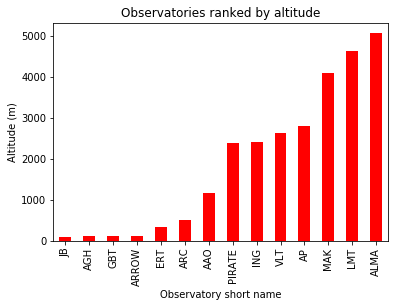

In [24]:
sorted_data=df_mod.sort_values(by='altitude')['altitude']
sorted_data.plot(kind='bar', color='r')
plt.title('Observatories ranked by altitude')
plt.ylabel('Altitude (m)')
plt.xlabel('Observatory short name')